### Importing The Dependancies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading The Data Into A DataFrame:

Here we have two datasests, one for training a machine learning model, and the other for evaluationg the model. We will be using the train one for now, and wwe will use the testing dataset at the end. <a href="https://www.kaggle.com/competitions/titanic/data">Click this to understand the data.</a>


In [2]:
df_train = pd.read_csv('../Datasets/Titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploartory Data Analysis:

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Checking for missing values:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

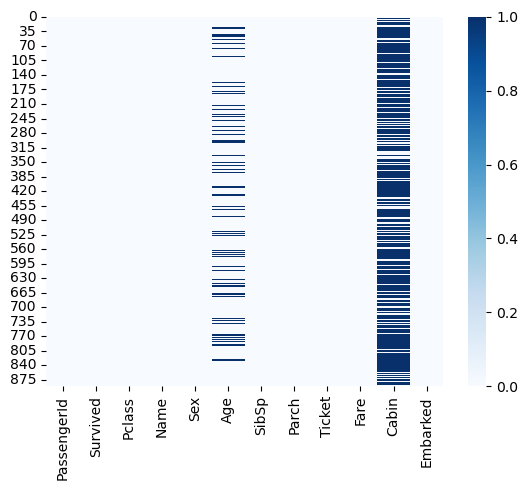

In [5]:
# Visualizing missing values:
sns.heatmap(df_train.isnull(), cmap='Blues')

Dealing with missing values:
Here we have a lot of missing values in two of the columns, the age column and the cabin column.

For the age column, I will replace the missing values with the mean, and for the cabin with the mode of of the column.

In [6]:
# Replacing the missing values in the age column with the mean:
df_train.Age = df_train.Age.replace(np.nan, df_train.Age.mean())

In [7]:
# Replacing the missing values in the cabin column with the mode:
# First we need to find the mode:
df_train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [8]:
# We can use any of the top 3, so I will use 'G6':
df_train.Cabin = df_train.Cabin.replace(np.nan, 'G6')

<AxesSubplot:>

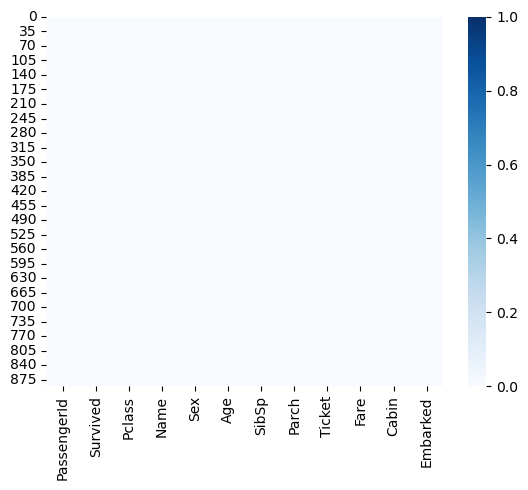

In [9]:
# Lerts visualize the missing values again:
sns.heatmap(df_train.isnull(), cmap='Blues')

* We have no missing values now.

In [10]:
# Now we want to start choosing features to make the model with:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,691,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.002015,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,29.699118,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


* Notice that we could've determined the mode with this as well.

In [11]:
# Performming one hot encoding for the sex column:
df_train = pd.get_dummies(data=df_train, columns=['Sex'])
df_train.drop(columns='Sex_female',inplace=True)
df_train.rename(columns={'Sex_male':'Sex'}, inplace=True)

In [13]:
df_train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,G6,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,G6,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,G6,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,G6,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,G6,S,0
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,C,1


In [14]:
# For the features, I'll use Pclass, Age, SibSp, Parch, Fare and Sex, so let me deop the other columns:
df_train.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'], inplace=True)
df_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex
0,0,3,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,0
2,1,3,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1
887,1,1,19.000000,0,0,30.0000,0
888,0,3,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


<AxesSubplot:>

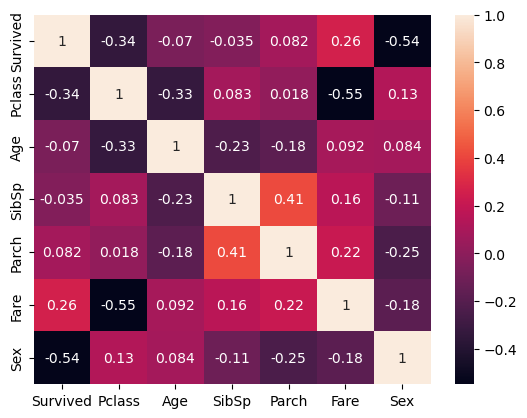

In [15]:
# checking the correlation coeffecients to see what columns don't influence the survival that much:
sns.heatmap(df_train.corr(),annot=True)

In [16]:
# Based on this result, I will not use the age, SibSp, Parch columns, so I will dop them as well:
df_train.drop(columns=['Age', 'SibSp', 'Parch'], inplace=True)

In [17]:
df_train

,Survived,Pclass,Fare,Sex
0,0,3,7.2500,1
1,1,1,71.2833,0
2,1,3,7.9250,0
3,1,1,53.1000,0
4,0,3,8.0500,1
...,...,...,...,...
886,0,2,13.0000,1
887,1,1,30.0000,0
888,0,3,23.4500,0
889,1,1,30.0000,1


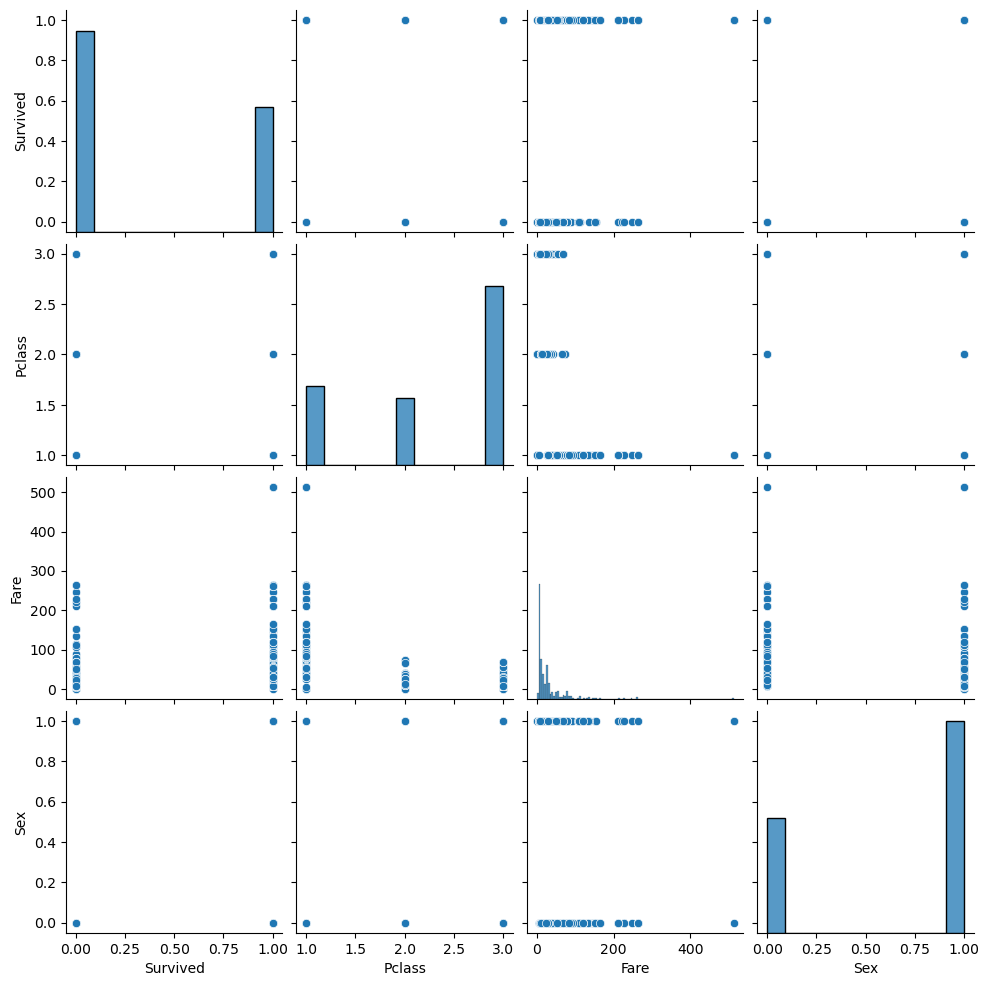

In [18]:
sns.pairplot(df_train)

### Creating the features and the target dataframes:

In [19]:
x = df_train.iloc[:,1:]
y = df_train.iloc[:,0].to_frame()

### Splitting The Dataset Into Test/Train:

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

### Feature Scaling:

In [21]:
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler()
x_train = x_scaler.fit_transform(x_train)
x_test = x_scaler.fit_transform(x_test)

### Label Encoding:
This section transforms the continuous y_train data to catagorical data, which is what we need in this task.

In [22]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
y_train = lab.fit_transform(y_train.values.ravel())

### Creating The Logistic Regression Model:

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

### Making Predictions:

In [24]:
predictions = lr.predict(x_test)

### Evaluating The Model:

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7802690582959642

<AxesSubplot:>

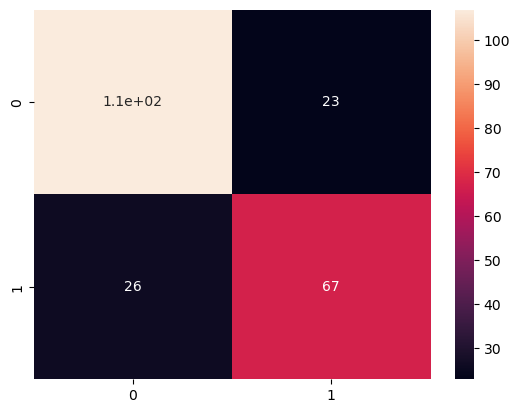

In [26]:
# Plotting the confusion matrix:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm,annot=True)